In [1]:
!pip install tensorflow scikit-learn numpy matplotlib pillow seaborn


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers, callbacks, preprocessing
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import os

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print("X : \n", x_train[0])
print("Y : ", y_train[0])
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print("X Normalized: \n", x_train[0])
print("Y Categorical: ", y_train[0])

X : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 

In [4]:
model = models.Sequential([
    layers.Conv2D(32, 3, activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Piyush\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
es = callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2,callbacks=[es],verbose=1)
model.save('prac1-2.keras')

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7769 - loss: 0.7026 - val_accuracy: 0.9730 - val_loss: 0.0882
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9619 - loss: 0.1284 - val_accuracy: 0.9821 - val_loss: 0.0603
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9725 - loss: 0.0894 - val_accuracy: 0.9844 - val_loss: 0.0485
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9768 - loss: 0.0772 - val_accuracy: 0.9869 - val_loss: 0.0460
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9811 - loss: 0.0614 - val_accuracy: 0.9876 - val_loss: 0.0430
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9828 - loss: 0.0566 - val_accuracy: 0.9886 - val_loss: 0.0406
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9850 - loss: 0.0473 - val_accuracy: 0.9898 - val_loss: 0.0388
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.9871 - loss: 0.0401 - val_accu

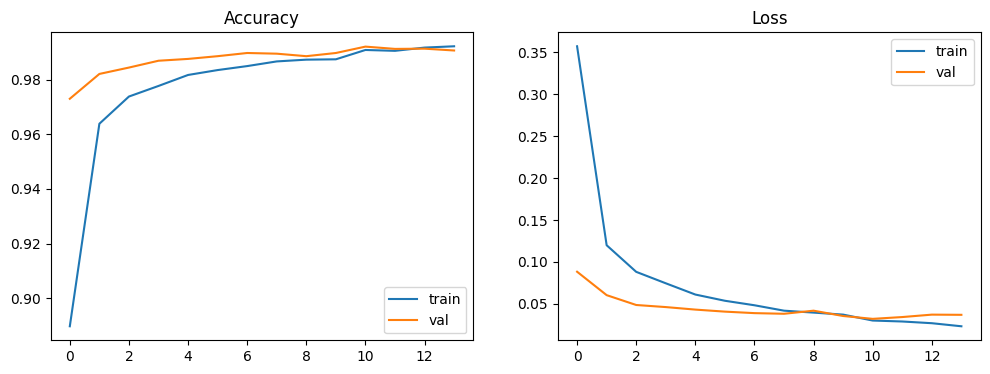

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



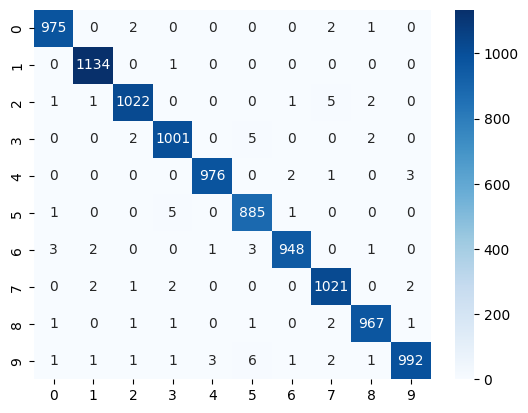

In [6]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1);
plt.plot(history.history['accuracy'], label='train');
plt.plot(history.history['val_accuracy'], label='val');
plt.legend();
plt.title('Accuracy')

plt.subplot(1,2,2);
plt.plot(history.history['loss'], label='train');
plt.plot(history.history['val_loss'], label='val');
plt.title('Loss')
plt.legend();
plt.show()

pred = np.argmax(model.predict(x_test), axis=1)
true = np.argmax(y_test, axis=1)
print(classification_report(true, pred))
sns.heatmap(confusion_matrix(true, pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [7]:
# Load trained model
model = load_model('mnist_cnn.keras')
# Test folder path
test_folder = r"D:\B.Tech\BTech\Deep Learning\Jupyter Notebook Reference\Practical - 1\Test-1 Dataset"
# Loop through available image files
for img_name in sorted(os.listdir(test_folder)):
    if not img_name.lower().endswith(('.jpg', '.jpeg', '.png')):
        continue

    img_path = os.path.join(test_folder, img_name)

    # Load and preprocess image
    img = Image.open(img_path).convert('L').resize((28, 28))
    x = np.array(img, dtype='float32') / 255.0
    if x.mean() > 0.5:
        x = 1 - x
    x = x.reshape(1, 28, 28, 1)

    # Predict
    pred = model.predict(x, verbose=0)[0]
    label = np.argmax(pred)
    confidence = np.max(pred) * 100

    print(f"{img_name} ->  Predicted: {label}, Confidence: {confidence:.2f}")

0.png ->  Predicted: 0, Confidence: 99.87
1.png ->  Predicted: 1, Confidence: 100.00
2.png ->  Predicted: 2, Confidence: 99.99
3.png ->  Predicted: 3, Confidence: 100.00
4.png ->  Predicted: 4, Confidence: 100.00
5.png ->  Predicted: 3, Confidence: 57.44
6.png ->  Predicted: 6, Confidence: 99.99
7.png ->  Predicted: 7, Confidence: 100.00
8.png ->  Predicted: 8, Confidence: 100.00
9.png ->  Predicted: 9, Confidence: 98.21
